In [5]:
from src.algorithm_functions import *
from plotnine import *
os.chdir('D:\Studia\MoCaDR_proj1')

In [3]:
train_df, test_array = split_ratings('Datasets/ratings.csv')
train_row_means = fillna_row_means(train_df)

In [4]:
res = perform_svd2_test(train_df.isna(), train_row_means, test_array, r=8)

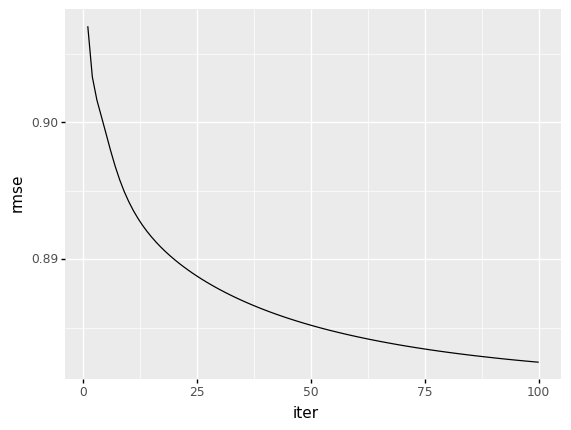

<ggplot: (95843079859)>

In [7]:
ggplot(res, aes(x='iter', y='rmse')) + \
    geom_line()